In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle as pkl
import matplotlib.pyplot as plt
import os, sys
import glob
%matplotlib inline

In [2]:
def is_float(string):
    """ True if given string is float else False"""
    try:
        return float(string)
    except ValueError:
        return False

def save_data(path,array):
    with open(path,'wb') as f:
        pkl.dump(array, f)

In [3]:
filelist = glob.glob("./data/ghg_data/ghg.gid.site*.dat")

data=[]
y=[]
for file in filelist:
    data_row = []
    with open(file, 'r') as f:
        d = f.readlines()
        for i in d:
            k = i.rstrip().split(" ")
            data_row.append(np.array([float(i) if is_float(i) else i for i in k]))

    if len(data_row)!=16:
        continue
    
    data_row = np.array(data_row)
    data.append(data_row[:-1,:])
    y.append(data_row[-1,:])
    
data = np.array(data)
y = np.array(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=1)

In [12]:
scaler_x = StandardScaler()
x_train_flat = scaler_x.fit_transform(np.reshape(X_train,[X_train.shape[0],-1]))
X_train = np.reshape(x_train_flat,X_train.shape)
x_test_flat = scaler_x.transform(np.reshape(X_test,[X_test.shape[0],-1]))
X_test = np.reshape(x_test_flat,X_test.shape)
#scaler_y = StandardScaler()
#y_train_flat = scaler_y.fit_transform(np.reshape(y_train,[-1,1]))
#y_train = np.reshape(y_train_flat,y_train.shape)
#y_test_flat = scaler_y.transform(np.reshape(y_test,[-1,1]))
#y_test = np.reshape(y_test_flat,y_test.shape)
#scaler_y=None

(array([7.32996e+05, 2.27390e+04, 5.10500e+03, 1.81400e+03, 7.03000e+02,
        2.87000e+02, 1.44000e+02, 5.80000e+01, 2.30000e+01, 3.00000e+00]),
 array([-0.69527682,  1.70551315,  4.10630313,  6.50709311,  8.90788308,
        11.30867306, 13.70946303, 16.11025301, 18.51104298, 20.91183296,
        23.31262294]),
 <a list of 10 Patch objects>)

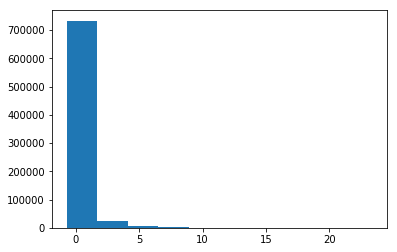

In [6]:
plt.hist(y_train.flatten())

In [13]:
data_dict={'x_train': X_train, 'y_train': y_train, 'x_test': X_test, 'y_test': y_test, 'scaler_x': scaler_x, 'scaler_y':scaler_y}
save_data('./data/ghg_data.pkl', data_dict)

In [47]:
#import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
xkcd_colors = mcolors.CSS4_COLORS
#xkcd_subsampled = [list(xkcd_colors.keys())[k] for k in range(0,len(xkcd_colors),int(len(xkcd_colors)/28))]
xkcd_subsampled = [list(xkcd_colors.keys())[k] for k in np.random.choice(range(len(xkcd_colors)),29,replace=False)]

In [42]:
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [49]:
l=[]

In [50]:
l.append(1)

In [51]:
l.append(2)

In [52]:
l

[1, 2]